In [1]:
import numpy as np
import jax

from classes.agent import Agent
from classes.ou_network import OU_Network
from classes.internal_state import Normative_DIS
from classes.action_state import Discounted_gain_soft_horizon_TSAS
from classes.sensory_state import Omniscient_ST

from classes.experiment import Experiment

from methods.policies import softmax_policy_init


In [2]:
N = 100
K = 3
links = [-1, -0.5, 0, 0.5, 1]
theta = 0.5
dt = 0.2
sigma = 1 

flat_prior = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
flat_prior = np.tile(flat_prior, (6, 1))

random_prior = np.random.rand(6, 5)

prior_perfect = np.array([[1, 0, 0, 0, 0],
                         [0, 0, 1, 0, 0],
                         [0, 0, 1, 0, 0],
                         [1, 0, 0, 0, 0],
                         [0, 0, 1, 0, 0],
                         [0, 0, 1, 0, 0]])

prior = random_prior

prior_sample_size = 100

#print(prior**prior_sample_size)

## TRUE MODEL
true_model = np.array([-1, 0, 0, -1, 0, 0])

# Action parameters
C = 1

poss_actions = np.arange(-100, 100)
poss_actions = np.array([85, 45, 0, -45, -85])
#actions = np.arange(-100, 100)
#actions = np.array([-80, 80])
action_len = 5

policy_funcs = softmax_policy_init(1) # Returns three function: sample, pmf, params
#policy = epsilon_greedy_init(0.50)

idle = True
epsilon = 1e-2 # Certainty threshold: agent stops intervening after entropy goes below epsilon

knowledge = False  # Can be a model as nd.array, True for perfect knowledge, 'random' for random sampling and False for posterior based sampling
#knowledge = np.array([1, -1, -1, 1, 1, -0.5])
#knowledge = true_model

horizon = 1e-1
discount = 0.1
depth = 0

behaviour = 'actor'   # Can be 'obs', 'random' or 'actor'



In [3]:
external_state = OU_Network(N, K, true_model, theta, dt, sigma)

sensory_state = Omniscient_ST(N, K)
action_state = Discounted_gain_soft_horizon_TSAS(N, K, behaviour, poss_actions, idle, action_len, policy_funcs, epsilon, C, knowledge, discount, horizon)
internal_state = Normative_DIS(N, K, prior, prior_sample_size, links, dt, theta, sigma, sample_params=True)

agent = Agent(N, sensory_state, internal_state, action_state)

experiment = Experiment(agent, external_state)

True model: [-1.  0.  0. -1.  0.  0.]

 Realisation 1 out of 1: 

Compute action values, C= 0 Model n: 0 Sampled graph: [ 0.  -0.5 -1.  -1.   1.   1. ]
argmax: 5 argmax seq: 5 sampled action: 1 sampled sequence: 1
Iter: 0
Current MAP: [ 0.  -0.5 -1.  -1.   1.   1. ]
Compute action values, C= 0 Model n: 5 Sampled graph: [-0.5 -0.5 -1.  -1.   1.   1. ]
argmax: 5 argmax seq: 5 sampled action: 7 sampled sequence: 7
Compute action values, C= 0 Model n: 10 Sampled graph: [-0.5 -0.5 -1.  -1.   1.   1. ]
argmax: 12 argmax seq: 12 sampled action: 6 sampled sequence: 6
Iter: 10
Current MAP: [-0.5 -0.5 -1.  -1.   1.   1. ]
Compute action values, C= 0 Model n: 15 Sampled graph: [-0.5 -0.5  0.  -1.   1.   1. ]
argmax: 9 argmax seq: 9 sampled action: 7 sampled sequence: 7
Compute action values, C= 0 Model n: 20 Sampled graph: [-0.5 -0.5  0.  -1.   0.   1. ]
argmax: 1 argmax seq: 1 sampled action: 8 sampled sequence: 8
Iter: 20
Current MAP: [-0.5 -0.5  0.  -1.   0.   1. ]
Compute action values, C= 0 

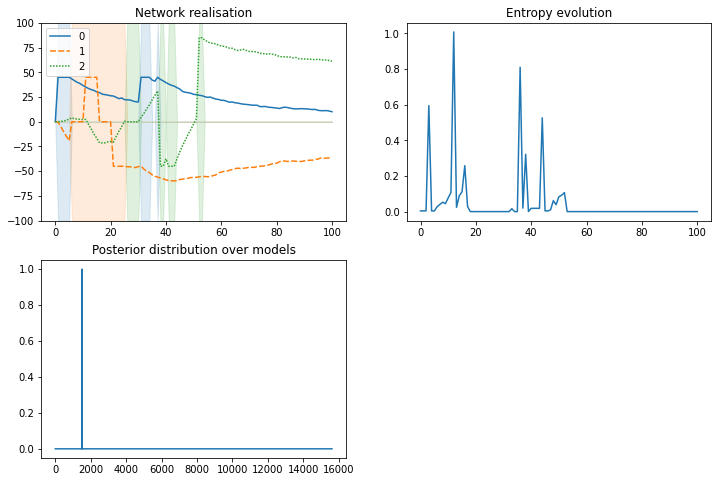

In [16]:
# Run experiment
experiment.run()
experiment.entropy_report()

In [6]:
np.inf + 1


inf